Task:2
------
Using the Titanic dataset:

Step 1: Handle missing values (e.g., fill or drop)

Step 2: Convert categorical columns to numeric (e.g., gender,
class)

Step 3: Plot survival rates by gender and class using matplotlib
or seaborn

️ Tools: pandas, seaborn, matplotlib
 Goal: Learn to clean data and visualize relationships
between variables.

Load the dataset in a data frame:

In [70]:
import pandas as pd
df=pd.read_csv('titanic.csv')

Step 1: Handle Missing Values in Titanic Dataset
------------------------------------------------
In this step, we are dealing with missing values that exist in different columns of our Titanic dataset.
Here is the reasoning for our approach:

1. Identify missing values:
   - First, we checked which columns have missing values and how many values are missing in each column.
   - Example: 'age' has 263 missing values, 'cabin' has 1014 missing values, 'embarked' has 2 missing values, etc.

2. Strategy for handling missing values:
   - Columns with a very high number of missing values (like 'cabin', 'boat', 'body', 'home.dest') 
     will be dropped because filling them would not be meaningful and they don’t add strong value to prediction.
   - Columns with very few missing values (like 'age', 'fare', 'embarked'):
        * 'age' → Replace missing values with median age (since age distribution is not uniform and median is more robust than mean).
        * 'fare' → Replace missing values with median fare (same reasoning as above).
        * 'embarked' → Replace missing values with mode (most frequent value) since it’s a categorical column.

3. Why this approach?
   - Dropping unnecessary columns reduces dataset noise.
   - Filling missing values instead of dropping rows helps us keep more passenger records, 
     so our dataset remains strong for training/testing.
   - This ensures better quality data for the next analysis and model-building steps.

Now let’s implement this plan in code.


In [71]:
# Drop columns with too many missing values
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# Fill missing values in 'age' and 'fare' with their median
df['age']= df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())   

# Fill missing values in 'embarked' with mode (most frequent value)
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

#verify if there are any missing values left
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Step 2: Convert categorical to numeric using Label Encoding
-----------------------------------------------------------

In [72]:
# Sex column: male=1, female=0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Embarked column: C=0, Q=1, S=2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


Step 3: Plot survival rates by gender and class using matplotlib or seaborn
--------------------------------------------------------------------

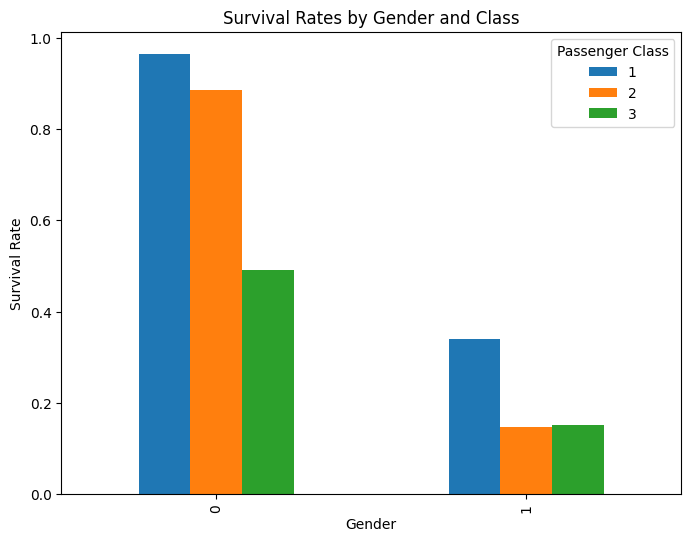

In [73]:
import matplotlib.pyplot as plt

# Step 1: Group data by 'sex' and 'pclass', calculate mean survival rate
survival_rates = df.groupby(['sex', 'pclass'])['survived'].mean().unstack()

# Step 2: Plot bar chart
survival_rates.plot(kind='bar', figsize=(8,6))

# Step 3: Labels and title
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rates by Gender and Class")
plt.legend(title="Passenger Class")

# Step 4: Show plot
plt.show()


Interpretation of Data Visualization:
------------------------------------
The chart shows the survival rates of Titanic passengers based on gender and class.

1. Gender effect:

 -More women survived compared to men.

-This means women had a higher chance of survival.

2. Class effect:

-Passengers in 1st class had better survival chances than those in 2nd or 3rd class.

-People in 3rd class had the lowest survival rate.

3. Combined effect (gender + class):

-Women in 1st class had the highest survival rate.

-Men in 3rd class had the lowest survival rate.